# Домашнє завдання: Інтерактивні візуалізації з Plotly

## Опис завдання
У цьому домашньому завданні ви будете створювати інтерактивні візуалізації з допомогою бібліотеки Plotly. Ви дізнаєтесь різницю між Plotly Express (швидкі графіки) та Graph Objects (повний контроль), та створите інтерактивний дашборд.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Завантаження даних
df = pd.read_csv('./data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

# Для plotly краще не встановлювати datetime як індекс
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()

# Додаємо назви сезонів
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

## Завдання 1: Базовий інтерактивний лінійний графік (Plotly Express)

**Завдання:**
Створіть інтерактивний лінійний графік динаміки оренди за часом (рівень деталізації - як в даних) з можливістю zoom та hover.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яка перевага інтерактивного графіка над статичним?
2. Чому на графіку є "пробіли" - ділянки, де одна пряма лінія зʼєднує два "суцільних" блоки з даними? Як би ви це могли дослідити на статичному графіку?


In [15]:
fig = px.line(df, x='datetime', y='count', title='Динаміка оренди велосипедів у часі')
fig.update_layout(xaxis_title='Дата та час', yaxis_title='Кількість оренд')
fig.show()

**Віждповіді на питання для інтерпретації:**
1. Перевага інтерактивного графіка над статичним полягає в тому, що є можливість масштабувати, наводити курсор, бачити точні значення.
2. На графіку є "пробіли" - ділянки, де одна пряма лінія зʼєднує два "суцільних" блоки з даними, оскільки у даних відсутні деякі часові точки, тому Plotly зʼєднує наявні точки лінією, створюючи при цьому візуальні стрибки.  Щоб дослідити це на статичному графіку можна побудувати графік з маркерами або перевірити частоту даних, щоб знайти прогалини (напр, побудувати гістограму кількості записів за годину/дні/місяці).

## Завдання 2: Scatter plot з додатковими даними (Plotly Express)

**Завдання:**
Створіть scatter plot кількості орендованих велосипедів випадковими користувачами vs кількості орендованих велосипедів зареєстрованими користувачами. Розмір точок встановіть за сумарною кількістю велосипедів, які були взяті в оренду, а колір - за сезоном. В hover_data - додайте деталі, які допоможуть вам в подальшому аналізі.

Дослідіть графік. Зверніть увагу, що ви можете вмикати і вимикати окремі сезони, якщо будете клікати на колір сезону в легенді графіку.

**Дайте відповідь на питання.**
- Як ви проінтерпретуєте роздвоєність цього графіку (дві явні лінії)? Що це означає?
- Які висновки для компанії, які дає велосипеди в оренду, ви можете зробити з цього графіку? 3 основних висновки.

In [16]:
df['workingday_label'] = df['workingday'].map({1: 'Робочий день', 0: 'Вихідний'})
df['holiday_label'] = df['holiday'].map({1: 'Свято', 0: 'Звичайний день'})
fig = px.scatter(
    df,
    x='casual',
    y='registered',
    size='count',
    color='season_name',
    hover_data={
        'datetime': True,
        'temp': True,
        'humidity': True,
        'windspeed': True,
        'workingday_label': True,
        'holiday_label': True,
        'workingday': False,
        'holiday': False
    },
    labels={
        'casual': 'Випадкові користувачі',
        'registered': 'Зареєстровані користувачі',
        'season_name': 'Сезон'
    },
    title='Оренда велосипедів: випадкові vs зареєстровані користувачі',
    size_max=20
)
fig.update_layout(
    legend_title_text='Сезон',
    template='plotly_white'
)
fig.show()

**Відповідь на питання.**
- Роздвоєність цього графіку (дві явні лінії) свідчить про те, що є два різні кластери: робоче використання (зареєстровані користувачі їздять на роботу/навчання в робочі дні) vs рекреаціне використання (активні випадкові користувачі орендують велосипеди у вихідні/святкові дні).
- Три основних висновки для компанії, яка дає велосипеди в оренду:
 1. Існують два різних типи користувачів — робочі та відпочивальники. Зареєстровані користувачі активні у робочі дні — це стабільне джерело доходу. Випадкові користувачі активні у вихідні/свята — сезонні та менш передбачувані.
2. Необхідні різні маркетингові стратегії: для зареєстрованих — програми лояльності, корпоративні пакети, зручні маршрути; для випадкових — промоакції на вихідні, реклама у туристичних зонах, прокат без підписки.
3. Оптимізувати кількість велосипедів за днями тижня: у робочі дні фокус на транспортну доступність у години пік; у вихідні — збільшення парку в зонах відпочинку/туризму.

## Завдання 3: Порівняння Plotly Express vs Graph Objects

**Завдання:**
Створіть лінійний графік помісячної динаміки оренди велосипедів двома способами - з Plotly Express та з Graph Objects.

**Дайте відповіді на питання.**
1. Як ви розумієте основну різницю між цими двома підходами?
2. Коли краще використовувати Plotly Express?
3. Коли потрібен Graph Objects?


In [17]:
# Графік з Plotly Express
monthly_data = df.groupby('month')['count'].sum().reset_index()
fig_express = px.line(
    monthly_data,
    x='month',
    y='count',
    markers=True,
    title='Оренда велосипедів помісячно (Plotly Express)'
)
fig_express.update_layout(xaxis_title='Місяць', yaxis_title='Кількість оренд')
fig_express.show()

In [18]:
# Графік з Graph Objects
fig_go = go.Figure()
fig_go.add_trace(go.Scatter(
    x=monthly_data['month'],
    y=monthly_data['count'],
    mode='lines+markers',
    name='Оренда',
    line=dict(color='green'),
    marker=dict(size=8)
))
fig_go.update_layout(
    title='Оренда велосипедів помісячно (Graph Objects)',
    xaxis_title='Місяць',
    yaxis_title='Кількість оренд'
)
fig_go.show()

**Відповіді на питання.**
1. Основна різниця між цими двома підходами полягає в тому, що Plotly Express — високорівневий, простий і швидкийспосіб побудови графіка, а Graph Objects — низькорівневий, гнучкий, складніший.
2. Plotly Express краще використовувати для швидкої побудови графіків з DataFrame; під час дослідження даних (EDA); тоді, коли не потрібна складна кастомізація.
3. Graph Objects потрібен для повного контролю над виглядом графіка; коли треба комбінувати кілька графіків, створювати subplot, анімацію, анотації; для інтерактивних дашбордів та презентацій з деталями.


## Завдання 4: Дашборд з make_subplots (Graph Objects)

**Завдання:**
Створіть дашборд з 4 різними графіками в одній фігурі:
- Bar chart - середні значення загальної кількості оренд велосипедів за сезонами
- Pie chart - відсоткове співвідношення погодних умов в даних
- Line chart - середнє значення загальної кількості оренд велосипедів за годинами протягом доби
- Scatter plot - кореляція температури vs вологість

Додайте заголовок на дашборд.

**Дайте відповідь на питання**
- На ваш погляд, яка перевага об'єднання графіків в один дашборд?

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Середня кількість оренд за сезонами",
        "Погодні умови",
        "Середня кількість оренд за годинами",
        "Температура vs Вологість"
    ),
    specs=[[{"type": "bar"}, {"type": "pie"}],
           [{"type": "scatter"}, {"type": "scatter"}]]
)

season_avg = df.groupby('season_name')['count'].mean().sort_index()
fig.add_trace(
    go.Bar(x=season_avg.index, y=season_avg.values, marker_color='indigo'),
    row=1, col=1
)

weather_counts = df['weather'].value_counts().sort_index()
weather_labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
fig.add_trace(
    go.Pie(labels=weather_labels, values=weather_counts, hole=0.3),
    row=1, col=2
)

hourly_avg = df.groupby('hour')['count'].mean()
fig.add_trace(
    go.Scatter(x=hourly_avg.index, y=hourly_avg.values, mode='lines+markers', line_color='green'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=df['temp'], y=df['humidity'], mode='markers',
               marker=dict(color=df['count'], colorscale='Viridis', showscale=True),
               text=df['count']),
    row=2, col=2
)

fig.update_layout(
    height=800,
    width=1000,
    title_text="Аналіз оренди велосипедів: Дашборд з 4 графіків",
    showlegend=False
)

fig.show()

**Відповідь на питання**
- Основна перевага об'єднання графіків в один дашборд — зручність одночасного аналізу кількох аспектів даних у єдиному вікні, що дозволяє швидко виявляти взаємозв’язки (наприклад, між погодою, годинами доби, сезонами та попитом), не перемикаючись між окремими візуалізаціями. Це економить час і сприяє комплексному розумінню ситуації.

## Завдання 5: 3D візуалізація

**Завдання:**
Створіть 3D scatter plot для аналізу взаємозв'язку температури, швидкості вітру та загальної кількості орендованих велосипедів. Колір встановіть за сезоном, а розмір - за загальною кількість оренд також.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яку додаткову інформацію, на ваш погляд, дає 3D візуалізація?
2. Чи видно кластери в 3D просторі?
3. Чи ви можете зробити висновки з цієї візуалізації, чи вам було простіше побудувати кілька 2D?



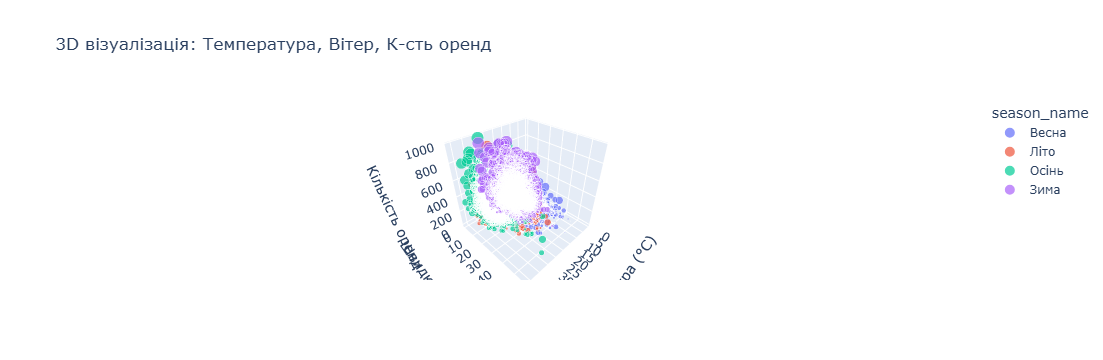

In [20]:
fig = px.scatter_3d(
    df,
    x='temp',
    y='windspeed',
    z='count',
    color='season_name',
    size='count',
    opacity=0.7,
    labels={
        'temp': 'Температура (°C)',
        'windspeed': 'Швидкість вітру',
        'count': 'К-сть оренд'
    },
    title='3D візуалізація: Температура, Вітер, К-сть оренд',
)

fig.update_layout(scene=dict(
    xaxis_title='Температура (°C)',
    yaxis_title='Швидкість вітру',
    zaxis_title='Кількість оренд'
))

fig.show()

**Відповіді на питання для інтерпретації:**
1. 3D візуалізація дозволяє одночасно оцінити взаємозв’язок між трьома змінними (температура, вітер, оренда), дає змогу побачити об’ємну структуру даних: як змінюється кількість оренд при зміні температури та вітру для різних сезонів.
2. В 3D-просторі частково видно скупчення (кластери) даних за сезонами: влітку та восени — більше точок з високою температурою та високою кількістю оренд, взимку — більшість точок зі зниженою активністю оренди, незалежно від вітру. Але без алгоритмів кластеризації це лише візуальні припущення.
3. 3D-plot зручний для огляду загальної картини, але: навігація складніша (потрібно обертати графік для розуміння), постійні підвисання ноутбука при виконанні операції обертання/збільшення/зменшення зображення. Для чітких висновків краще побудувати кілька 2D-графіків (наприклад, temp vs count, windspeed vs count по сезонах).
Тому 3D добре для враження й первинної інтуїції, а 2D — для точного аналізу.


## Завдання 6: Експорт та збереження інтерактивних графіків

**Завдання:**
Збережіть побудований раніше дашборд в формат HTML. Також змініть вручну щось на дашборді (зум, виділення частини графіку) і збережіть його як статичне зображення через іконку фотоапарату у формат PNG. Завантажте файли з дашбордом у HTML та PNG (або посилання на них на github) разом з посиланням на цей ноутбук при здачі ДЗ.


In [21]:
fig.write_html("dashboard.html")